In [167]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import time

# Ask user to select a file
root = tk.Tk()
root.withdraw()
print("Select a  file to load for analysis")

# Open file dialog box and allow user to select a file, default extension xlsx
file_path = filedialog.askopenfilename(filetypes=[("Excel Files", "*.xlsx")])

# Load selected excel file into Pandas DataFrame starting at row 3
df = pd.read_excel(file_path, skiprows=2, engine='xlrd')

# Convert the columns to formats we need
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df['Claimed Amount'] = pd.to_numeric(df['Claimed Amount'])
df['Approved Amount (rpt)'] = pd.to_numeric(df['Approved Amount (rpt)'])
df['Sent for Payment Date'] = pd.to_datetime(df['Sent for Payment Date'])

# Filter data for transactions over 1000 and sort by employee ID  
filtered_df = df[df['Approved Amount (rpt)'] > 1].sort_values(by=['Employee ID'])

#sort by employee ID
filtered_df = filtered_df.sort_values(by=['Employee ID'])


Select a  file to load for analysis


TypeError: expected str, bytes or os.PathLike object, not NoneType

In [ ]:
import pandas as pd
        

# TEST 1-------------------Same employee, same vendor same total


# Group by employee id, vendor, and approved amount
grouped_df = filtered_df.groupby(['Employee ID', 'Vendor', 'Approved Amount (rpt)'])

# Filter groups with more than one row per employee
filtered_groups = grouped_df.filter(lambda x: len(x) > 1)

# Sort the filtered groups by employee id, vendor, and approved amount
sorted_filtered_groups = filtered_groups.sort_values(by=['Employee ID', 'Vendor', 'Approved Amount (rpt)', 'Transaction Date'])

# Display tuples with each other, separated by a blank line
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    for _, group in sorted_filtered_groups.groupby(['Employee ID', 'Vendor', 'Approved Amount (rpt)']):
        print(group[['Employee ID', 'Vendor', 'Approved Amount (rpt)', 'Transaction Date']])
        print("")

# Print the total number of rows
print("Total number of rows:", len(sorted_filtered_groups))

# Print the first 50 rows of the grouped data same vendor,
print("Test 1 - same employee, vendor, and total")
print(sorted_filtered_groups[['Employee ID', 'Vendor', 'Approved Amount (rpt)', 'Transaction Date']].head(50))


      Employee ID                       Vendor  Approved Amount (rpt)  \
58840      100582  Choice Hotels International                  20.79   
58930      100582  Choice Hotels International                  20.79   
59011      100582  Choice Hotels International                  20.79   

      Transaction Date  
58840       2023-02-18  
58930       2023-02-19  
59011       2023-02-20  

      Employee ID                       Vendor  Approved Amount (rpt)  \
58839      100582  Choice Hotels International                  139.0   
58929      100582  Choice Hotels International                  139.0   
59010      100582  Choice Hotels International                  139.0   

      Transaction Date  
58839       2023-02-18  
58929       2023-02-19  
59010       2023-02-20  

      Employee ID   Vendor  Approved Amount (rpt) Transaction Date
8027       100582  HAZTECH                  150.0       2022-02-26
15518      100582  HAZTECH                  150.0       2022-04-24

      Empl

In [ ]:


# TEST 2-----------same employee, amount and date -----------------------------
import pandas as pd

# Group by employee id, approved amount, and transaction date
grouped_df2 = filtered_df.groupby(['Employee ID', 'Approved Amount (rpt)', 'Transaction Date'])

# Filter groups with more than one row per employee
filtered_groups2 = grouped_df2.filter(lambda x: len(x) > 1)

# Sort the filtered groups by employee id, approved amount, and transaction date
sorted_filtered_groups2 = filtered_groups2.sort_values(by=['Employee ID', 'Approved Amount (rpt)', 'Transaction Date'])

# Display tuples with each other, separated by a blank line
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    for _, group in sorted_filtered_groups2.groupby(['Employee ID', 'Approved Amount (rpt)', 'Transaction Date']):
        print(group[['Employee ID', 'Approved Amount (rpt)', 'Transaction Date', 'Report Name']])
        print("")

# Print the total number of rows
print("Total number of rows:", len(sorted_filtered_groups2))

# Print the first 50 rows of the grouped data same amount and date
print("Test 2 - same employee, amount, and date")
print(sorted_filtered_groups2[['Employee ID', 'Approved Amount (rpt)', 'Transaction Date', 'Report Name']].head(50))


     Employee ID  Approved Amount (rpt) Transaction Date Report Name
3096      101348                   30.0       2022-01-13      Travel
3095      101348                   30.0       2022-01-13      Travel

      Employee ID  Approved Amount (rpt) Transaction Date     Report Name
31646      101422                  15.02       2022-08-24  8.27.22 Report
31645      101422                  15.02       2022-08-24  8.27.22 Report

      Employee ID  Approved Amount (rpt) Transaction Date          Report Name
14938      102742                  13.02       2022-04-19  Accomondation claim
14939      102742                  13.02       2022-04-19  Accomondation claim

      Employee ID  Approved Amount (rpt) Transaction Date          Report Name
14937      102742                  65.12       2022-04-19  Accomondation claim
14936      102742                  65.12       2022-04-19  Accomondation claim

      Employee ID  Approved Amount (rpt) Transaction Date  \
59733      103246               

In [ ]:
# TEST 3-----------same employee, SAME AMOUNT-----------------------------
import pandas as pd

# Group by employee id and approved amount
grouped_df3 = filtered_df.groupby(['Employee ID', 'Approved Amount (rpt)'])

# Filter groups with more than one row per employee
filtered_groups3 = grouped_df3.filter(lambda x: len(x) > 1)

# Sort the filtered groups by employee id and approved amount
sorted_filtered_groups3 = filtered_groups3.sort_values(by=['Employee ID', 'Approved Amount (rpt)'])

# Display tuples with each other, separated by a blank line
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    for _, group in sorted_filtered_groups3.groupby(['Employee ID', 'Approved Amount (rpt)']):
        print(group[['Employee ID', 'Approved Amount (rpt)', 'Transaction Date', 'Vendor']])
        print("")

# Print the total number of rows
print("Total number of rows:", len(sorted_filtered_groups3))

# Print the first 50 rows of the grouped data same amount
print("Test 3 - same employee and amount")
print(sorted_filtered_groups3[['Employee ID', 'Approved Amount (rpt)', 'Transaction Date', 'Vendor']].head(50))


      Employee ID  Approved Amount (rpt) Transaction Date Vendor
10800      100541                   30.0       2022-03-18    NaN
8481       100541                   30.0       2022-03-02    NaN
14501      100541                   30.0       2022-04-15    NaN

      Employee ID  Approved Amount (rpt) Transaction Date Vendor
36678      100541                  48.56       2022-09-26    NaN
32752      100541                  48.56       2022-09-01    NaN
25717      100541                  48.56       2022-07-09    NaN
3860       100541                  48.56       2022-01-20    NaN
29188      100541                  48.56       2022-08-04    NaN

      Employee ID  Approved Amount (rpt) Transaction Date Vendor
30767      100541                  49.14       2022-08-17    NaN
39479      100541                  49.14       2022-10-12    NaN
27278      100541                  49.14       2022-07-20    NaN
11922      100541                  49.14       2022-03-26    NaN
12269      100541      

In [ ]:
# TEST 4-----------keyword test-----------------------------
import pandas as pd
import tkinter as tk
from tkinter import filedialog

# Create a Tkinter file dialog box to open an Excel file
root = tk.Tk()
root.withdraw()

file_path = filedialog.askopenfilename()

# Read in keywords from the Excel file
keywords = pd.read_excel(file_path)

# Convert the first column of keywords DataFrame to a list
keywords = keywords.iloc[:, 0].tolist()

# Group the data with any of the keywords, sort by keyword, and add a line break
grouped_df4 = filtered_df[filtered_df['Report Name'].str.contains('|'.join(keywords))].sort_values(by=['Report Name'])
                                                                                                                                         
# Remove empty dataframes from the grouped data
grouped_df4 = grouped_df4[grouped_df4['Approved Amount (rpt)'].notna()]

# Print total number of rows
print("Total number of rows:", len(grouped_df4))

# Print first 50 rows of the grouped data just employee id, amount, date, and report name
print("Test 4 - Keyword search")
print(grouped_df4[['Employee ID', 'Transaction Date', 'Report Name', 'Approved Amount (rpt)']].head(50))


Total number of rows: 16
Test 4 - Keyword search
      Employee ID Transaction Date                     Report Name  \
37149      108961       2022-09-28              Maglite spare part   
27516      110755       2022-07-21     Saudi Aerospace Event Fboro   
16091      109756       2022-04-27  Saudia Aerospace Houston Visit   
16090      109756       2022-04-27  Saudia Aerospace Houston Visit   
16089      109756       2022-04-27  Saudia Aerospace Houston Visit   
36298      109869       2022-09-22    Wharton Aerospace Conference   
36299      109869       2022-09-22    Wharton Aerospace Conference   
36301      109869       2022-09-22    Wharton Aerospace Conference   
36300      109869       2022-09-22    Wharton Aerospace Conference   
36123      109869       2022-09-21    Wharton Aerospace Conference   
36124      109869       2022-09-21    Wharton Aerospace Conference   
36125      109869       2022-09-21    Wharton Aerospace Conference   
36452      109869       2022-09-23    Wha

In [ ]:
import pandas as pd
def within_1_percent(df):
    """
    Filter data within 1% of each other in the Approved Amount 
    """
    if len(df) >= 2:
        mean_payment = df['Approved Amount (rpt)'].mean()
        upper_limit = mean_payment * 1.01
        lower_limit = mean_payment * 0.99
        return df[(df['Approved Amount (rpt)'] <= upper_limit) & (df['Approved Amount (rpt)'] >= lower_limit)]
    else:
        return pd.DataFrame()
def within_5_days(df):
    """
    Filter data for transactions that happened within 5 days of each other
    """
    if len(df) >= 2:
        max_date = df['Transaction Date'].max()
        min_date = df['Transaction Date'].min()
        if (max_date - min_date).days <= 5:
            return df
        else:
            return pd.DataFrame()
    else:
        return pd.DataFrame()
# Define a function to filter groups with less than 2 rows
def at_least_2_rows(df):
    return len(df) >= 2
import pandas as pd

# Define the within_1_percent and within_5_days functions here

# Assuming you have a dataframe named 'filtered_df' with columns 'Employee ID', 'Vendor Name', 'Transaction Date', 'Report Name', and 'Approved Amount (rpt)'

# TEST 5: Group by same employee and same vendor
import pandas as pd

# Define the within_1_percent and within_5_days functions here

# Assuming you have a dataframe named 'filtered_df' with columns 'Employee ID', 'Vendor Name', 'Transaction Date', 'Report Name', and 'Approved Amount (rpt)'

# TEST 5: Group by same employee and same vendor
grouped_df5 = filtered_df.groupby(['Employee ID', 'Vendor']).apply(lambda x: within_1_percent(within_5_days(x)))

# Reset the index after applying the filter functions
grouped_df5.reset_index(drop=True, inplace=True)

# Filter out groups with less than 2 rows
grouped_df5 = grouped_df5[grouped_df5.groupby(['Employee ID', 'Vendor']).transform(at_least_2_rows)['Approved Amount (rpt)']]

# Reset the index again
grouped_df5.reset_index(drop=True, inplace=True)

# Print total number of rows
print("Total number of rows:", len(grouped_df5))

# Print the first 50 rows of the grouped data with Employee ID, Vendor Name, Transaction Date, Report Name, Transaction Count, and Total Amount
print("Test 5 - Group by same employee and same vendor, fuzzy match on date and amount")

# Display tuples separated by a blank line
unique_employee_vendor_pairs = grouped_df5[['Employee ID', 'Vendor']].drop_duplicates()

for index, row in unique_employee_vendor_pairs.iterrows():
    employee_id = row['Employee ID']
    vendor = row['Vendor']
    temp_df = grouped_df5[(grouped_df5['Employee ID'] == employee_id) & (grouped_df5['Vendor'] == vendor)]
    print(temp_df[['Employee ID', 'Vendor', 'Transaction Date', 'Report Name', 'Approved Amount (rpt)']])
    print("\n")


Total number of rows: 470
Test 5 - Group by same employee and same vendor, fuzzy match on date and amount
  Employee ID           Vendor Transaction Date    Report Name  \
0      100660  Homewood Suites       2023-02-02  1 - 15 FEB 23   
1      100660  Homewood Suites       2023-02-05  1 - 15 FEB 23   
2      100660  Homewood Suites       2023-02-04  1 - 15 FEB 23   
3      100660  Homewood Suites       2023-02-03  1 - 15 FEB 23   

   Approved Amount (rpt)  
0                 122.57  
1                 122.57  
2                 122.57  
3                 122.57  


  Employee ID              Vendor Transaction Date      Report Name  \
4      100862  Houston city meter       2022-11-08  10.25.22 Report   
5      100862  Houston city meter       2022-11-07  10.25.22 Report   

   Approved Amount (rpt)  
4                    4.5  
5                    4.5  


  Employee ID           Vendor Transaction Date     Report Name  \
6      100933  Marriott Hotels       2023-01-24  1.27.23 Repor

In [ ]:
import pandas as pd

# Define the within_1_percent and within_5_days functions here

# Assuming you have a dataframe named 'filtered_df' with columns 'Employee ID', 'Vendor Name', 'Expense Type', 'Transaction Date', 'Report Name', and 'Approved Amount (rpt)'

# TEST 6: Group by same employee and expense type
grouped_df6 = filtered_df.groupby(['Employee ID', 'Expense Type']).apply(lambda x: within_1_percent(within_5_days(x)))

# Reset the index after applying the filter functions
grouped_df6.reset_index(drop=True, inplace=True)

# Filter out groups with less than 2 rows
grouped_df6 = grouped_df6[grouped_df6.groupby(['Employee ID', 'Expense Type']).transform(at_least_2_rows)['Approved Amount (rpt)']]

# Reset the index again
grouped_df6.reset_index(drop=True, inplace=True)

# Print total number of rows
print("Total number of rows:", len(grouped_df6))

# Print the first 50 rows of the grouped data with Employee ID, Expense Type, Transaction Date, Report Name, Transaction Count, and Total Amount
print("Test 6 - Group by same employee and expense type")

# Display tuples separated by a blank line
unique_employee_expense_pairs = grouped_df6[['Employee ID', 'Expense Type']].drop_duplicates()

for index, row in unique_employee_expense_pairs.iterrows():
    employee_id = row['Employee ID']
    expense_type = row['Expense Type']
    temp_df = grouped_df6[(grouped_df6['Employee ID'] == employee_id) & (grouped_df6['Expense Type'] == expense_type)]
    print(temp_df[['Employee ID', 'Expense Type', 'Transaction Date', 'Report Name', 'Approved Amount (rpt)']])
    print("\n")


Total number of rows: 528
Test 6 - Group by same employee and expense type
  Employee ID Expense Type Transaction Date     Report Name  \
0      100610    Hotel Tax       2023-02-26  Feb Hitch 2023   
1      100610    Hotel Tax       2023-02-27  Feb Hitch 2023   

   Approved Amount (rpt)  
0                  15.44  
1                  15.44  


  Employee ID Expense Type Transaction Date               Report Name  \
2      100719        Hotel       2022-12-17  Recurrent Training AW139   
3      100719        Hotel       2022-12-18  Recurrent Training AW139   

   Approved Amount (rpt)  
2                   89.0  
3                   89.0  


  Employee ID Expense Type Transaction Date               Report Name  \
4      100719    Hotel Tax       2022-12-18  Recurrent Training AW139   
5      100719    Hotel Tax       2022-12-17  Recurrent Training AW139   

   Approved Amount (rpt)  
4                  11.08  
5                  11.08  


  Employee ID          Expense Type Transactio

Plot 1 - Top 20 Employees by Total Approved Amount

Employee
Stepanek, David Frederick        239872.61
Bradshaw, Christopher            136599.51
Gibran, Charles Michael          101676.40
Lapin, Richard                   100710.08
Tye, Simon                        76721.06
Gordon, Crystal Lou               75838.05
Willows, Bryan David              73005.44
Stavley, Stuart Brian             71173.05
Whalen, Jennifer Dawn             45478.98
Reitz, Christoph                  35035.46
Nelson, Amanda                    34804.30
De Campos, Rodrigo Pupin          34241.86
Beamish, Michael Edward           31027.30
Hamilton, Graham Douglas          27882.46
Seale, John                       27621.22
Tilahun, Redeate Arega            26035.37
Inderkummen, Jean-Pierre          25424.05
Arlotta Filho, Anselmo            24707.77
Willenbacher, Samantha Nicola     24587.50
Corbett, Alan                     23644.49
Name: Approved Amount (rpt), dtype: float64


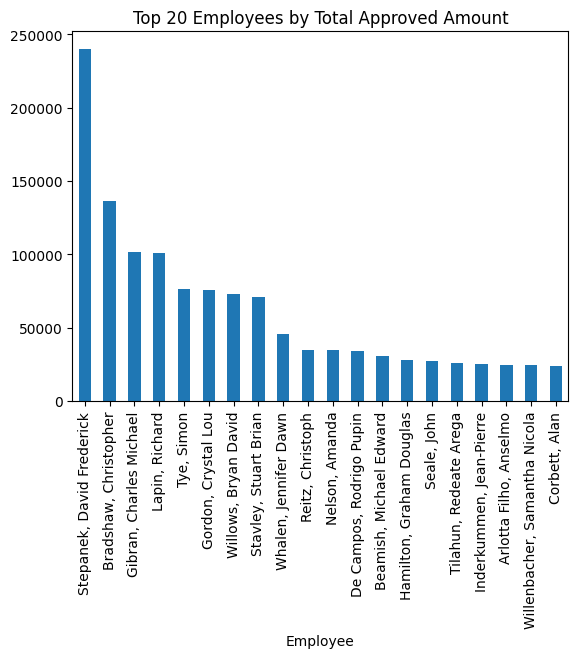

In [ ]:
import matplotlib.pyplot as plt

# print title and a blank line
print("Plot 1 - Top 20 Employees by Total Approved Amount")
print()


# print the top 20 employees by total approved amount
top_20_employees = filtered_df.groupby(['Employee'])['Approved Amount (rpt)'].sum().sort_values(ascending=False).head(20)
print(top_20_employees)




#plot the data by employee id and approved amount sort by total approved amount with title, top 50 employees
filtered_df.groupby(['Employee'])['Approved Amount (rpt)'].sum().sort_values(ascending=False).head(20).plot(kind='bar', title='Top 20 Employees by Total Approved Amount')

#save this as plot 1 variable
plot1 = filtered_df.groupby(['Employee'])['Approved Amount (rpt)'].sum().sort_values(ascending=False).head(20).plot(kind='bar', title='Top 20 Employees by Total Approved Amount')


Plot 2 - Top 20 Vendors by Total Approved Amount

Vendor
United                  343459.47
American Airlines       109821.10
Marriott Hotels          63390.52
United Airlines          57226.92
Hilton Hotels            50098.92
KLM                      41411.30
Delta Air Lines          40430.64
Tesco                    36656.20
Uber                     27781.52
Enterprise               23673.46
CAA                      23303.12
British Airways          21554.70
United                   20742.94
Emirates Air             19270.71
A+O                      18584.76
Hyatt Hotels             17103.88
Hampton Inn & Suites     15524.45
Malmaison                14848.21
Shell                    14558.19
Saudia Airlines          13109.98
Name: Approved Amount (rpt), dtype: float64


<Axes: title={'center': 'Top 20 Vendors by Total Approved Amount'}, xlabel='Vendor'>

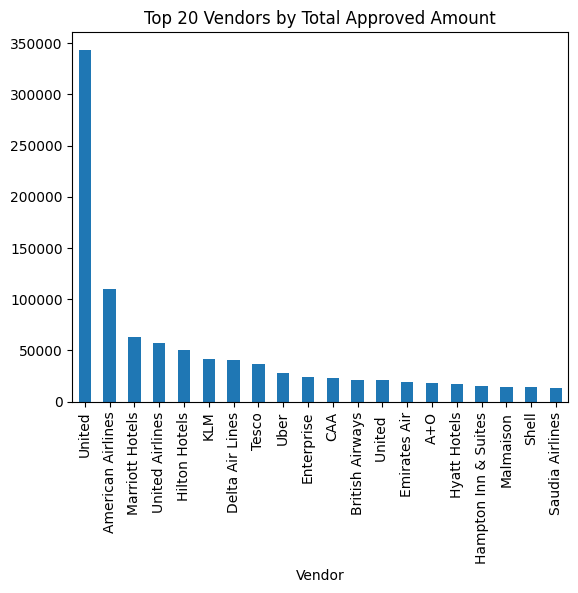

In [ ]:
# print title and a blank line
print("Plot 2 - Top 20 Vendors by Total Approved Amount")
print()

# print the top 20 vendors by total approved amount
top_20_vendors = filtered_df.groupby(['Vendor'])['Approved Amount (rpt)'].sum().sort_values(ascending=False).head(20)
print(top_20_vendors)

#plot the data by vendor and approved amount sort by total approved amount with title top 20 vendors
filtered_df.groupby(['Vendor'])['Approved Amount (rpt)'].sum().sort_values(ascending=False).head(20).plot(kind='bar', title='Top 20 Vendors by Total Approved Amount')

Plot 3 - Top 20 Report Names by Total Approved Amount

Employee                   Report Name                     
Bradshaw, Christopher      Expense Report-CB 2022 03 30        30490.00
                           Expense Report-CB 2022 09 21        29425.38
                           Expense Report-CB 2022 07 14        26993.67
Stepanek, David Frederick  Volocopter & Airbus Govt Affairs    25068.01
                           Expense Report-DS 2022 03 24        24450.50
Bradshaw, Christopher      Expense Report-CB 2022 12 22        22996.83
Gordon, Crystal Lou        January February 2022               20745.90
Feldmann, Steven RAY       SURINAME PER DIEM                   16154.04
Lapin, Richard             Expense Report #10                  16132.13
Stepanek, David Frederick  January February 2022               15889.32
Bradshaw, Christopher      Expense Report-CB 2022 06 01        15538.30
Stepanek, David Frederick  Saudi Feb 10th                      15354.45
                     

<Axes: title={'center': 'Top 20 Report Names by Total Approved Amount'}, xlabel='Employee,Report Name'>

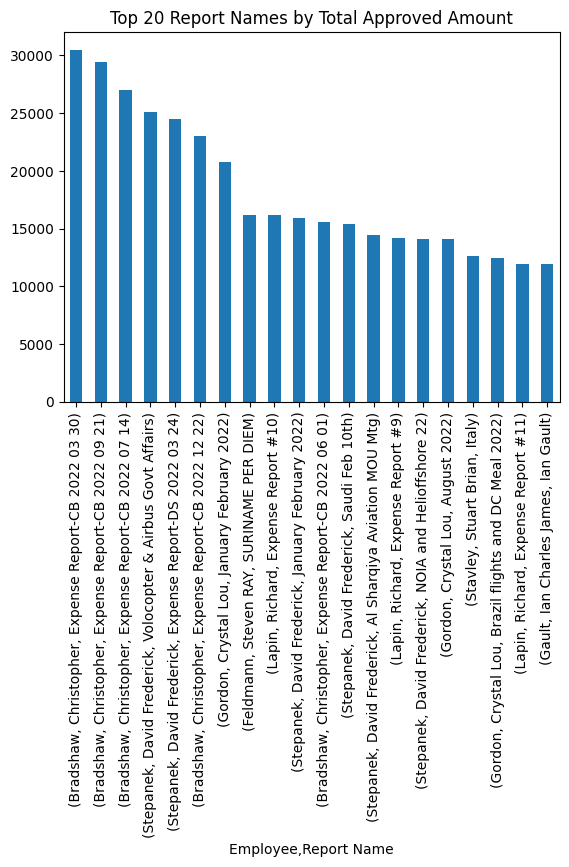

In [ ]:
# print title and a blank line
print("Plot 3 - Top 20 Report Names by Total Approved Amount")
print()
# print the top 20 report names by total approved amount
top_20_report_names = filtered_df.groupby(['Employee','Report Name'])['Approved Amount (rpt)'].sum().sort_values(ascending=False).head(20)
print(top_20_report_names)

#plot the data by report name and approved amount sort by total approved amount with title top 20 report names, include employee
filtered_df.groupby(['Employee','Report Name'])['Approved Amount (rpt)'].sum().sort_values(ascending=False).head(20).plot(kind='bar', title='Top 20 Report Names by Total Approved Amount')

Plot 4 - Top 20 Expense Types by Total Approved Amount

Expense Type
Airfare                            789295.23
Per Diem - GOM Standard            615230.00
Per Diem - GOM Other               469290.00
Hotel                              442336.12
Per Diem - International           440000.00
Personal Car Mileage               386277.96
Individual Meals - (UK)            376511.07
Vehicle Fuel                       261414.72
Miscellaneous                      234639.62
Meals & Entertainment - Staff      231802.89
International Guyana Per Diem      201190.00
Subsistence Travel-Groceries       161656.63
Professional Subscriptions/Dues    112387.87
Taxi                               112097.92
Individual Meals                   106416.37
Medical Expenses                    83616.49
Car Rental                          67246.90
Base to Base Mileage                55132.01
Aircraft Fuel                       50947.16
Seminar/Course fees                 50128.49
Name: Approved Amount (rpt), dt

<Axes: title={'center': 'Top 20 Expense Types by Total Approved Amount'}, xlabel='Expense Type'>

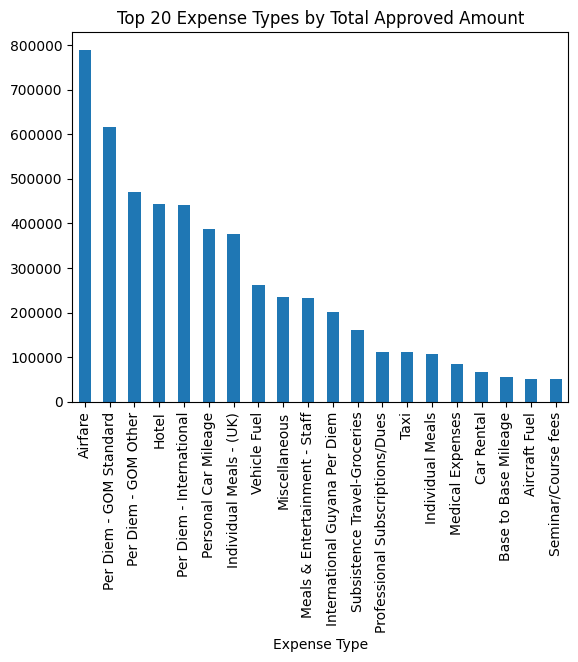

In [ ]:
# print title and a blank line
print("Plot 4 - Top 20 Expense Types by Total Approved Amount")
print()
# print the top 20 expense types by total approved amount
top_20_expense_types = filtered_df.groupby(['Expense Type'])['Approved Amount (rpt)'].sum().sort_values(ascending=False).head(20)
print(top_20_expense_types)

#plot the data by expense type and approved amount sort by total approved amount with title top 20 expense types
filtered_df.groupby(['Expense Type'])['Approved Amount (rpt)'].sum().sort_values(ascending=False).head(20).plot(kind='bar', title='Top 20 Expense Types by Total Approved Amount')

Plot 5 - Top 20 Employees by Average Expense Amount

Employee
Pucillo, Christopher         9524.340000
Kern, Wesley Edward          3039.885000
Gordon, Crystal Lou          1223.194355
Stavley, Stuart Brian        1002.437324
Byrne, Courtney               918.960000
Abousoud, Jad Nayef           905.500000
Grieve, Matthew               853.540000
Bradshaw, Christopher         808.281124
Omolayo, Ayodele Ebenezer     736.960000
Cowan, Richard                731.660000
Angelov, Borislav             669.560000
Van Wagenen, Jay Ellison      659.144286
Spence, Andrew Courtney       654.376364
Matherne, Evan Paul           634.700000
Ibifuro-Harrison, Otonye      632.830000
Demo, Empaling                600.000000
Morgan, Adam Kean             564.993333
Reitz, Christoph              500.506571
Kullman, John                 500.320968
Stepanek, David Frederick     498.695655
Name: Approved Amount (rpt), dtype: float64


<Axes: title={'center': 'Top 20 Employees by Average Approved Amount'}, xlabel='Employee'>

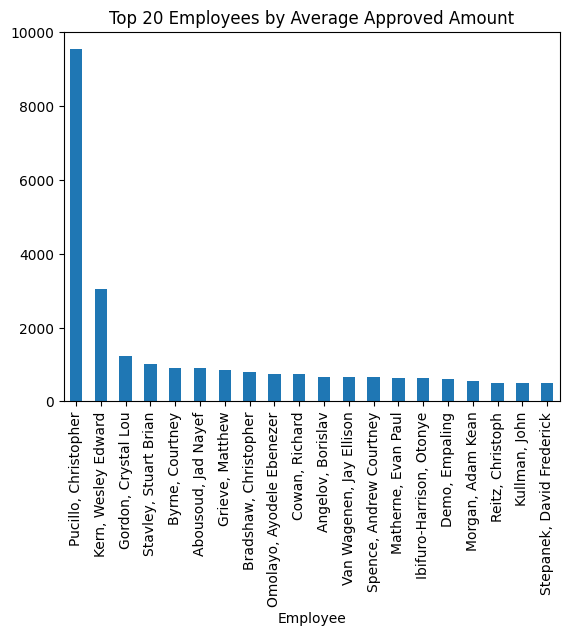

In [ ]:
# print title and a blank line
print("Plot 5 - Top 20 Employees by Average Expense Amount")
print()
# print the top 20 employees by average approved amount
top_20_employees = filtered_df.groupby(['Employee'])['Approved Amount (rpt)'].mean().sort_values(ascending=False).head(20)
print(top_20_employees)

# plot the average approved amount by employee id with title top 20 employees
filtered_df.groupby(['Employee'])['Approved Amount (rpt)'].mean().sort_values(ascending=False).head(20).plot(kind='bar', title='Top 20 Employees by Average Approved Amount')

Plot 6 - Top 20 Vendors by Average Expense Amount

Vendor
Deanes Removals              9629.350
Turkish Airlines             7889.230
YPO - Houston Chapter        7760.000
Qantas                       5136.200
The Leaven Kids              5000.000
A+O                          4646.190
Datacom Security             4599.900
Nick & Sam's                 4506.880
YPO International            4195.000
Signature                    4086.890
Million Air Tallahassee      4071.370
Qantas Airways               4046.580
Philippine                   4005.080
Alex Hutcheon and company    3958.120
Workiva                      3885.000
Emirates Air                 3854.142
Ridgewell's                  3831.140
Saudia Air                   3813.680
Giorgios of Gramercy         3779.820
Lumi                         3624.840
Name: Approved Amount (rpt), dtype: float64


<Axes: title={'center': 'Top 20 Report Names by Average Expense Amount'}, xlabel='Report Name'>

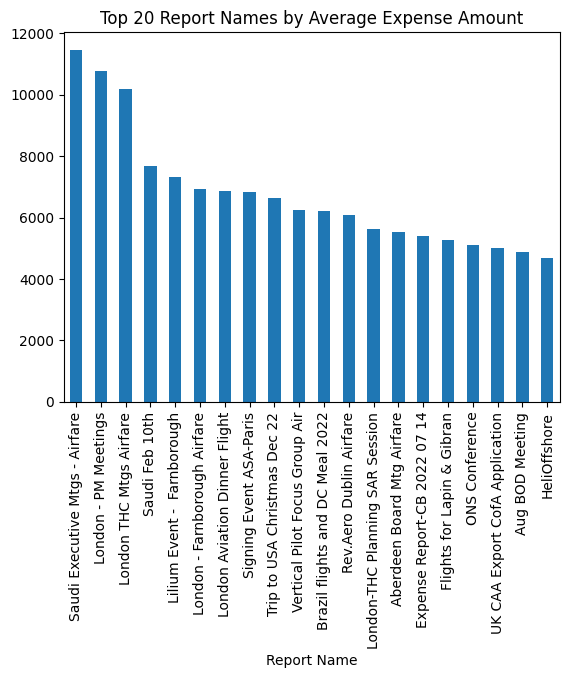

In [ ]:
# print title and a blank line
print("Plot 6 - Top 20 Vendors by Average Expense Amount")
print()
# print the top 20 vendors by average approved amount
top_20_vendors = filtered_df.groupby(['Vendor'])['Approved Amount (rpt)'].mean().sort_values(ascending=False).head(20)
print(top_20_vendors)


# plot the average approved amount by report name with title top 20 report names

filtered_df.groupby(['Report Name'])['Approved Amount (rpt)'].mean().sort_values(ascending=False).head(20).plot(kind='bar', title='Top 20 Report Names by Average Expense Amount')

Plot 7 - Top 20 Report Names by Average Expense Amount

Expense Type
Aircraft Fuel                           1819.541429
Airfare                                  842.364173
International Guyana Per Diem            728.949275
Per Diem - International                 614.525140
Relocation Expenses                      570.937222
Seminar/Course fees                      506.348384
Hurricane Damage Reimbursement           418.238333
Professional Subscriptions/Dues          416.251370
Car Rental                               341.354822
Tuition/Training Reimbursement           309.702762
Per Diem - GOM Other                     240.908624
Meals & Entertainment - Clients          228.520611
Hotel                                    215.563411
Per Diem - GOM Standard                  204.056385
Tool/Equipment                           182.500915
Flight Physical                          179.481685
Shop Expenses - Supplies                 170.415940
Meals & Entertainment - Clients (UK)     149.07

<Axes: title={'center': 'Top 20 Expense Types by Average Approved Amount'}, xlabel='Expense Type'>

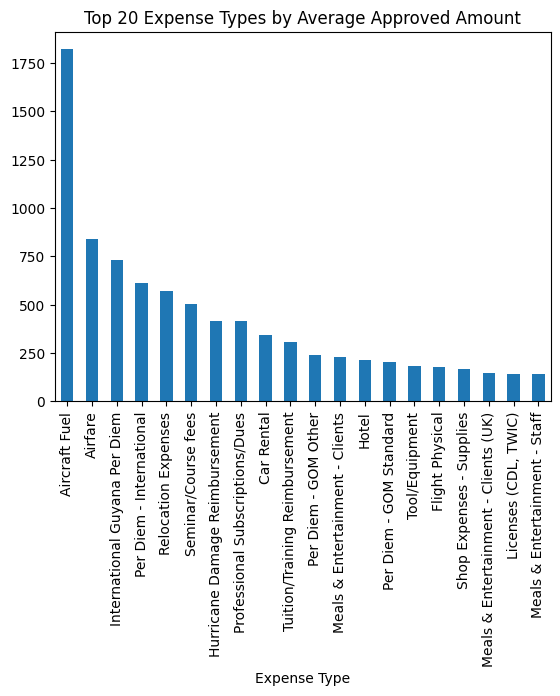

In [ ]:
# print title and a blank line
print("Plot 7 - Top 20 Report Names by Average Expense Amount")
print()
# print the top 20 expense types by average approved amount
top_20_expense_types = filtered_df.groupby(['Expense Type'])['Approved Amount (rpt)'].mean().sort_values(ascending=False).head(20)
print(top_20_expense_types)

# plot the average approved amount by expense type with title top 20 expense types
filtered_df.groupby(['Expense Type'])['Approved Amount (rpt)'].mean().sort_values(ascending=False).head(20).plot(kind='bar', title='Top 20 Expense Types by Average Approved Amount')

Plot 8 - Top 20 Expense Types by Average Expense Amount

Report Name
Saudi Executive Mtgs - Airfare     11458.440
London - PM Meetings               10762.550
London THC Mtgs Airfare            10191.180
Saudi Feb 10th                      7677.225
Lilium Event -  Farnborough         7321.030
London - Farnborough Airfare        6917.770
London Aviation Dinner Flight       6868.580
Signing Event ASA-Paris             6815.330
Trip to USA Christmas Dec 22        6621.740
Vertical Pilot Focus Group Air      6261.150
Brazil flights and DC Meal 2022     6212.735
Rev.Aero Dublin Airfare             6068.750
London-THC Planning SAR Session     5633.820
Aberdeen Board Mtg Airfare          5544.470
Expense Report-CB 2022 07 14        5398.734
Flights for Lapin & Gibran          5260.010
ONS Conference                      5098.170
UK CAA Export CofA Application      4994.650
Aug BOD Meeting                     4862.170
HeliOffshore                        4698.820
Name: Approved Amount (rpt), dt

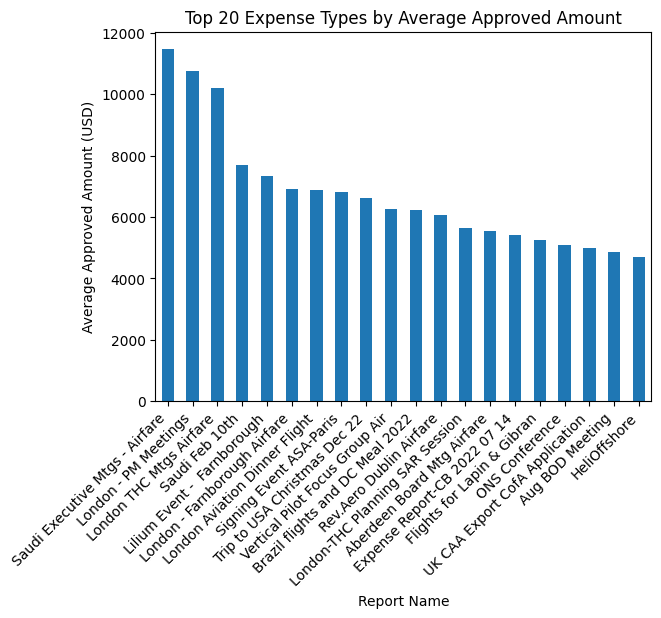

In [ ]:
# print title and a blank line
print("Plot 8 - Top 20 Expense Types by Average Expense Amount")
print()
# print the top 20 report names by average approved amount
# print  the average approved amount by expense type with title top 20 reports
top_20_reports = filtered_df.groupby(['Report Name'])['Approved Amount (rpt)'].mean().sort_values(ascending=False).head(20)
print (top_20_reports)
top_20_reports.plot(kind='bar', title='Top 20 Expense Types by Average Approved Amount')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Report Name')
plt.ylabel('Average Approved Amount (USD)')
plt.show()


Plot 9 - Total Approved Amount by Month

Year  Month
2020  Dec          41.55
2021  Jan         304.29
      Feb         188.75
      Mar        1263.94
      Apr         271.85
      May         361.12
      Jun         326.05
      Jul         714.55
      Aug        1506.85
      Sep        2905.97
      Oct        9584.84
      Nov       30020.87
      Dec      106069.76
2022  Jan      301482.11
      Feb      321963.76
      Mar      410122.05
      Apr      321610.73
      May      406722.62
      Jun      428434.53
      Jul      446459.98
      Aug      344987.20
      Sep      412369.61
      Oct      472707.74
      Nov      405198.13
      Dec      364955.47
2023  Jan      395908.14
      Feb      421047.30
      Mar      108904.84
Name: Approved Amount (rpt), dtype: float64


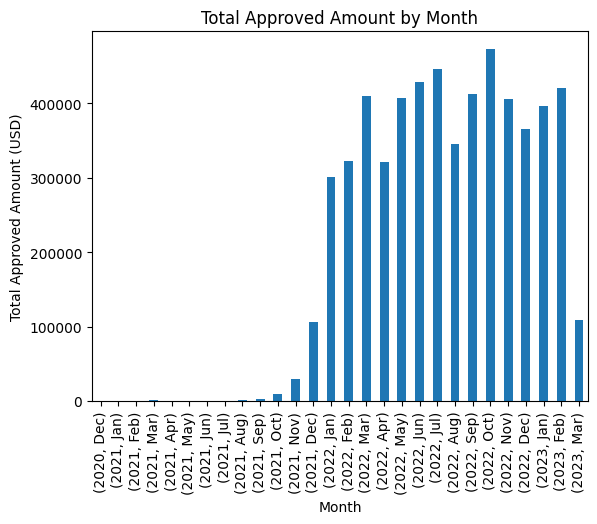

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Assuming you have grouped_df3 DataFrame already
# convert 'Transaction Date' column to datetime type
filtered_df['Transaction Date'] = pd.to_datetime(filtered_df['Transaction Date'])

# group by month and year and calculate the total approved amount
total_approved_by_month = filtered_df.groupby([filtered_df['Transaction Date'].dt.year, filtered_df['Transaction Date'].dt.month])['Approved Amount (rpt)'].sum()

# sort by year and month
total_approved_by_month = total_approved_by_month.sort_index()

# rename the index to month names and years
total_approved_by_month.index = total_approved_by_month.index.set_names(['Year', 'Month'])
total_approved_by_month.index = total_approved_by_month.index.map(lambda x: (x[0], calendar.month_abbr[x[1]]))

# print title and a blank line
print("Plot 9 - Total Approved Amount by Month")
print()

# print the total approved amount by month and year
print(total_approved_by_month)

# plot the bar chart
total_approved_by_month.plot(kind='bar', title='Total Approved Amount by Month')
plt.xlabel('Month')
plt.ylabel('Total Approved Amount (USD)')
plt.show()


Plot 10 - Average Approved Amount by Month

Dec 2020     41.550000
Jan 2021    101.430000
Feb 2021     62.916667
Mar 2021     84.262667
Apr 2021     67.962500
May 2021     60.186667
Jun 2021     54.341667
Jul 2021     89.318750
Aug 2021     68.493182
Sep 2021     67.580698
Oct 2021     98.812784
Nov 2021     82.930580
Dec 2021     88.465188
Jan 2022     88.515006
Feb 2022    102.929591
Mar 2022     92.977114
Apr 2022     85.854439
May 2022     99.980978
Jun 2022    100.382973
Jul 2022    110.784114
Aug 2022     88.822657
Sep 2022     85.341393
Oct 2022     93.144382
Nov 2022     80.253145
Dec 2022     85.650192
Jan 2023     85.843049
Feb 2023    119.717742
Mar 2023    153.171364
Name: Approved Amount (rpt), dtype: float64


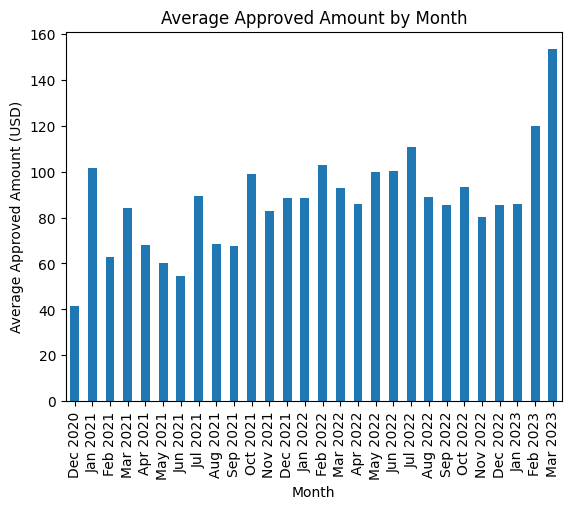

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Assuming you have grouped_df3 DataFrame already
# convert 'Transaction Date' column to datetime type
filtered_df['Transaction Date'] = pd.to_datetime(filtered_df['Transaction Date'])

# group by month and year and calculate the average approved amount
avg_approved_by_month = filtered_df.groupby([filtered_df['Transaction Date'].dt.year, filtered_df['Transaction Date'].dt.month])['Approved Amount (rpt)'].mean()

# sort by year and month
avg_approved_by_month = avg_approved_by_month.sort_index()

# rename the index to month names and years
avg_approved_by_month.index = avg_approved_by_month.index.set_names(['Year', 'Month'])
avg_approved_by_month.index = avg_approved_by_month.index.map(lambda x: (x[0], calendar.month_abbr[x[1]]))
avg_approved_by_month.index = avg_approved_by_month.index.map(lambda x: f"{x[1]} {x[0]}")

# print title and a blank line
print("Plot 10 - Average Approved Amount by Month")
print()

# print the average approved amount by month and year
print(avg_approved_by_month)

# plot the bar chart
avg_approved_by_month.plot(kind='bar', title='Average Approved Amount by Month')
plt.xlabel('Month')
plt.ylabel('Average Approved Amount (USD)')
plt.show()


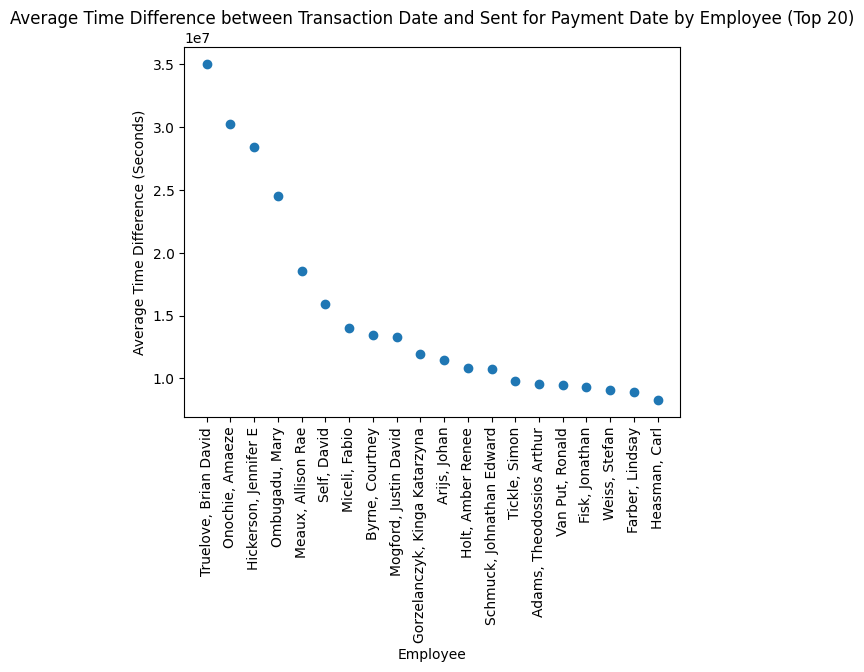

Plot 11 - Average Time Difference between Transaction Date and Sent for Payment Date by Employee (Top 20)



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# convert 'Transaction Date' column to datetime type
filtered_df['Transaction Date'] = pd.to_datetime(filtered_df['Transaction Date'])
filtered_df['Sent for Payment Date'] = pd.to_datetime(filtered_df['Sent for Payment Date'])
filtered_df['Difference'] = (filtered_df['Sent for Payment Date'] - filtered_df['Transaction Date']).dt.total_seconds()

# average time difference between transaction date and sent for payment date by employee
avg_time_diff_by_employee = filtered_df.groupby(['Employee'])['Difference'].mean()

# sort by average time difference in descending order and show only the top 20 employees
top_20 = avg_time_diff_by_employee.sort_values(ascending=False).head(20)

# make a scatter plot with by employee on the x axis and average time difference on the y axis, sort by average time difference in descending order
plt.scatter(top_20.index, top_20.values)
plt.title('Average Time Difference between Transaction Date and Sent for Payment Date by Employee (Top 20)')
plt.xlabel('Employee')
plt.xticks(rotation=90)
plt.ylabel('Average Time Difference (Seconds)')
plt.show()

# print title and a blank line
print("Plot 11 - Average Time Difference between Transaction Date and Sent for Payment Date by Employee (Top 20)")
print()



Plot 12 - Time Differences between Transaction Date and Sent for Payment Date



C:\Users\Alex\AppData\Local\Temp\ipykernel_32\2189179801.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Difference'] = df['Difference'] / (24*3600) # convert to days


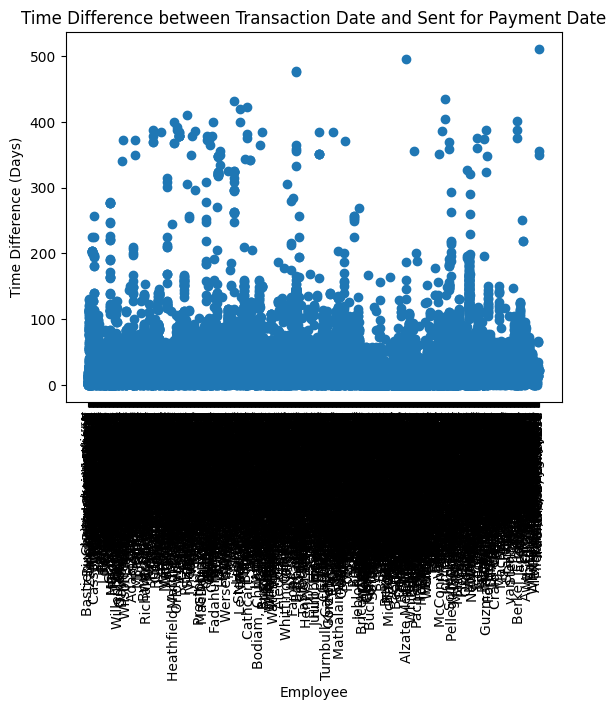

Plot 13 - Time Differences over 180 Days between Transaction Date and Sent for Payment Date

                     Employee Transaction Date Sent for Payment Date  \
28      Truelove, Brian David       2021-05-11            2022-10-04   
94          Sargent, Nathan T       2021-09-21            2023-01-30   
36    Beamish, Michael Edward       2021-06-27            2022-10-17   
37    Beamish, Michael Edward       2021-06-29            2022-10-17   
445             Dixon, Andrew       2021-11-21            2023-01-30   
3               Corbett, Alan       2021-01-31            2022-04-08   
22              Galie, Davide       2021-04-07            2022-06-03   
7             Lorraine, James       2021-03-04            2022-04-28   
38              Pettit, Colin       2021-07-01            2022-08-16   
3712            Dixon, Andrew       2022-01-19            2023-02-27   

      Difference  
28      0.005914  
94      0.005741  
36      0.005521  
37      0.005498  
445     0.005035  


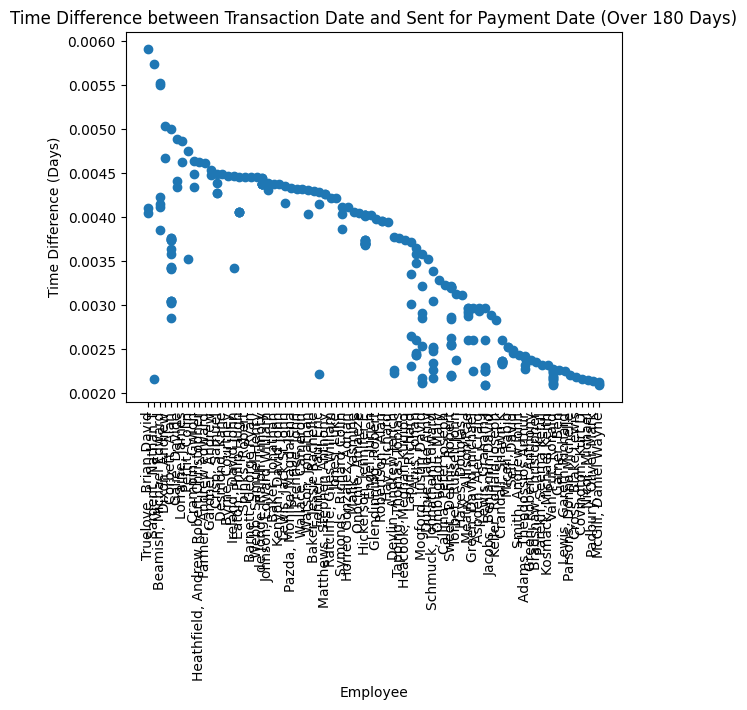

In [ ]:
print("Plot 12 - Time Differences between Transaction Date and Sent for Payment Date")
print()


# print a table of time differences  between transaction date and sent for payment date by transaction date, only show employee, transaction date, sent for payment date, and difference in days
df = filtered_df[['Employee', 'Transaction Date', 'Sent for Payment Date', 'Difference']]
df['Difference'] = df['Difference'] / (24*3600) # convert to days


#plot the time difference in days between transaction date and sent for payment date in a scatter plot all time differences
plt.scatter(df['Employee'], df['Difference'])
plt.title('Time Difference between Transaction Date and Sent for Payment Date')
plt.xlabel('Employee')
plt.xticks(rotation=90)
plt.ylabel('Time Difference (Days)')
plt.show()

# print a table of transactions with time differences over 180 days between transaction date and sent for payment date sort by difference in descending order, only show employee, transaction date, sent for payment date, and difference, show the difference in days
df = df[df['Difference'] > 180].sort_values(by='Difference', ascending=False)[['Employee', 'Transaction Date', 'Sent for Payment Date', 'Difference']]
df['Difference'] = df['Difference'] / (24*3600) # convert to days

# print title and a blank line
print("Plot 13 - Time Differences over 180 Days between Transaction Date and Sent for Payment Date")
print()

# print first 10    rows of the table   
print(df.head(10))



 
#plot the time difference in days between transaction date and sent for payment date in a scatter plot only show the time differences greater than 180 days
plt.scatter(df['Employee'], df['Difference'])
plt.title('Time Difference between Transaction Date and Sent for Payment Date (Over 180 Days)')
plt.xlabel('Employee')
plt.xticks(rotation=90)
plt.ylabel('Time Difference (Days)')
plt.show()





Plot 14 - Approved Amount Difference from Average of vendor by Employee ID

     Employee ID  Approved Amount Difference             Vendor  \
4158        BOD2                 8805.850000    British Airways   
4159        BOD4                 2555.559021    British Airways   
251         BOD4                 2555.559021  American Airlines   
2151      101376                 1280.711333    Delta Air Lines   
548       109757                  650.584720               Uber   
...          ...                         ...                ...   
593         BOD7                 -734.552216               Uber   
654       101381                -1305.149824             United   
656       105811                -1811.349824             United   
691       110781                -1950.349824             United   
679       110030                -1985.349824             United   

      Approved Amount (rpt)  
4158             718.490000  
4159             718.490000  
251              250.161959  

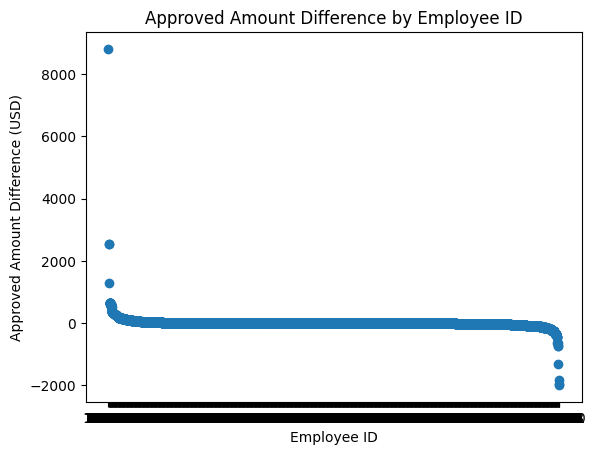

      Employee ID  Approved Amount Difference                Vendor  \
4158         BOD2                 8805.850000       British Airways   
4159         BOD4                 2555.559021       British Airways   
251          BOD4                 2555.559021     American Airlines   
2151       101376                 1280.711333       Delta Air Lines   
548        109757                  650.584720                  Uber   
...           ...                         ...                   ...   
2447       109460                  107.839524        Domino's Pizza   
15055      109460                  107.839524       Jay Gruhlkey MD   
2374       110162                  107.133690    Southwest Airlines   
431        110162                  107.133690                  Lyft   
408        109976                  104.084898  Hampton Inn & Suites   

       Approved Amount (rpt)  
4158              718.490000  
4159              718.490000  
251               250.161959  
2151              898.4

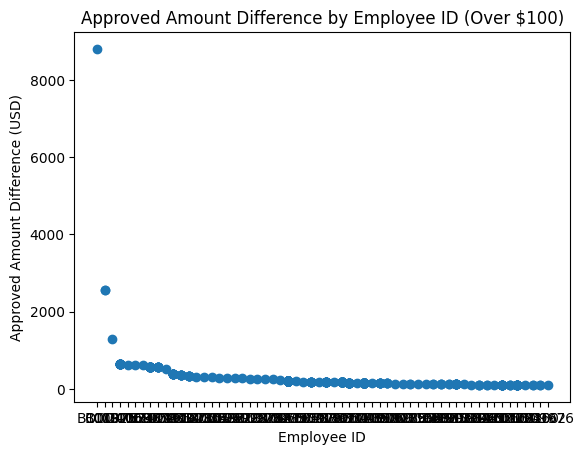

In [ ]:
import matplotlib.pyplot as plt

# Calculate the average approved amount per vendor
avg_approved_by_vendor = filtered_df.groupby(['Vendor'])['Approved Amount (rpt)'].mean()

# Compare the approved amount with the vendor's average for each transaction
filtered_df['Approved Amount Difference'] = filtered_df['Approved Amount (rpt)'] - filtered_df['Vendor'].map(avg_approved_by_vendor)

# Group by Employee ID and calculate the mean approved amount difference, include approved amount, vendor name and average for reference, sort by difference in descending order
result_df = filtered_df.groupby(['Employee ID'])['Approved Amount Difference'].mean().reset_index()
result_df = result_df.merge(filtered_df[['Employee ID', 'Vendor']].drop_duplicates(), on='Employee ID')
result_df = result_df.merge(avg_approved_by_vendor.reset_index(), on='Vendor')
result_df = result_df.sort_values(by='Approved Amount Difference', ascending=False)

# print title and a blank line
print("Plot 14 - Approved Amount Difference from Average of vendor by Employee ID")
print()

# Display the result
print(result_df)

# Scatter Plot by employee id, approved amount differences on y, employee id on x axis, filter for difference is greater than 100
plt.scatter(result_df['Employee ID'], result_df['Approved Amount Difference'])
plt.title('Approved Amount Difference by Employee ID')
plt.xlabel('Employee ID')
plt.ylabel('Approved Amount Difference (USD)')
plt.show()

# filter for difference is greater than 100
result_df = result_df[result_df['Approved Amount Difference'] > 100]

# Display the result
print(result_df)

# print title and a blank line
print("Plot 15 - Approved Amount Difference from Average of Vendor (Over $100)")
print()


# Scatter Plot by employee id, approved amount differences on y, employee id on x axis, filter for difference is greater than 100
plt.scatter(result_df['Employee ID'], result_df['Approved Amount Difference'])
plt.title('Approved Amount Difference by Employee ID (Over $100)')
plt.xlabel('Employee ID')
plt.ylabel('Approved Amount Difference (USD)')
plt.show()




In [ ]:
import os
import pandas as pd
from tkinter import filedialog

# Save the Excel file
print("Saving Excel file...")

# Create a Tkinter file save dialog box with default extension '.xlsx'
file_path = filedialog.asksaveasfilename(defaultextension='.xlsx', filetypes=[('Excel files', '*.xlsx')])

# Create an Excel writer object
writer = pd.ExcelWriter(file_path, engine='xlsxwriter')

# Create a cover sheet
worksheet = writer.book.add_worksheet('Cover Sheet')

cover_sheet_data = [
    ('Test 1 - same employee, amount, date, and report', 'Test 1'),
    ('Test 2 - same employee, amount, and date', 'Test 2'),
    ('Test 3 - same employee and amount', 'Test 3'),
    ('Test 4 - keywords', 'Test 4'),
    ('Test 5 - same employee, vendor', 'Test 5'),
    ('Test 6 - same employee, vendor, amount', 'Test 6'),
]

for i, (text, sheet_name) in enumerate(cover_sheet_data, start=1):
    worksheet.write(f'A{i}', text)
    worksheet.write_url(f'B{i}', f'internal:{sheet_name}!A1', string=sheet_name)

# Test DataFrames
dfs = {
    'Test 1': filtered_df,
    'Test 2': grouped_df2,
    'Test 3': grouped_df3,
    'Test 4': grouped_df4,
    'Test 5': grouped_df5,
    'Test 6': grouped_df6,
}

for sheet_name, df in dfs.items():
    # Create a worksheet for the test
    worksheet = writer.book.add_worksheet(sheet_name)

    # Write the DataFrame to the worksheet starting at A2
    df.to_excel(writer, sheet_name=sheet_name, startrow=1, index=False)

    # Set column widths
    worksheet.set_column('A:G', 20)

    # Write the test title in cell A1
    worksheet.write('A1', f'{sheet_name} - {df.name}')

    # Link the test title to the cover sheet
    worksheet.write_url('A1', f'internal:Cover Sheet!B{i}')

# Save and close the Excel file
writer.save()
import os
import pandas as pd
import matplotlib.pyplot as plt

def create_plot(data, title, xlabel, ylabel, kind='bar', rotation=90, filepath=None, dpi=300, **kwargs):
    fig, ax = plt.subplots()
    data.plot(kind=kind, title=title, ax=ax, **kwargs)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    if filepath:
        plt.savefig(filepath, dpi=dpi, bbox_inches='tight')
        plt.close(fig)
    else:
        plt.show()

# Code for reading the data and initializing writer is not shown

# Rest of the code for generating plots
grouped_cols = [
    ('Employee', 'Approved Amount (rpt)'),
    ('Vendor', 'Approved Amount (rpt)'),
    ('Report Name', 'Approved Amount (rpt)'),
    ('Expense Type', 'Approved Amount (rpt)'),
    ('Employee', 'Expense Amount'),
    ('Vendor', 'Expense Amount'),
    ('Report Name', 'Expense Amount'),
    ('Expense Type', 'Expense Amount'),
    ('Month', 'Expense Amount')
]

for i, (group_col, value_col) in enumerate(grouped_cols):
    data = filtered_df.groupby(group_col)[value_col].sum().sort_values(ascending=False).head(20)
    create_plot(data, f'Top 20 {group_col}s by Total {value_col}', group_col, value_col, filepath=f'plot{i+1}.png')

    # Create a new worksheet and insert the image
    worksheet = writer.book.add_worksheet(f'Plot {i+1}')
    worksheet.insert_image('A1', f'plot{i+1}.png')

# Additional plots and calculations go here

print("Excel file saved successfully!")

writer.save()
writer.close()
os.startfile(file_path)


Saving Excel file...


ValueError: If using all scalar values, you must pass an index

Save file